<a href="https://www.advfn.com/nasdaq/nasdaq.asp?companies=A">Nasdaq Stocks</a>

In [1]:
!python3 best_stock_by_state.py
!say data ready

Current State: 2
n batches: 112
ZKID
Total DFs: 112
Complete. Data written to ../data/dar_by_state.csv


In [2]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

from best_stock_by_state import get_daily_returns

In [3]:
states = pd.read_csv('../data/hmm_exp_returns.csv')
states = states[['Date', 'state']]
states.index = pd.to_datetime(states.Date)
states.drop(columns='Date', inplace=True)
states.tail()

,state
Date,
2023-01-30,2
2023-01-31,2
2023-02-01,2
2023-02-02,2
2023-02-03,2


In [4]:
states.state.value_counts()

3    2662
4    2662
5    1581
1    1519
0    1518
2    1469
7    1286
6     695
Name: state, dtype: int64

In [5]:
STATES = sorted(states.state.unique())
CURRENT_STATE = states.state.to_numpy()[-1]
CURRENT_STATE

2

In [6]:
TOMORROW = (datetime.now() + timedelta(1)).date()
YEARS_OF_DATA = 50
MIN_YEARS = 10
START = TOMORROW - timedelta(YEARS_OF_DATA * 365)

In [7]:
df = pd.read_csv('../data/dar_by_state.csv', index_col=0)
df.head()

,dar,dar_0,dar_1,dar_2,dar_3,dar_4,dar_5,dar_6,dar_7
APD,1.000496,0.991570,0.999219,1.000969,1.001605,1.001224,1.001760,1.001492,1.005578
APDN,0.998553,0.987787,1.000178,0.995193,0.999573,0.998839,1.001329,0.999484,1.001609
APEI,0.999850,0.988740,0.999958,0.999581,0.998846,1.001063,1.010203,1.002062,1.005172
APEN,0.998625,0.989481,0.998806,0.998414,0.998794,0.998896,1.011288,0.999485,1.003743
APH,1.000684,0.989219,1.000223,1.000203,1.002346,1.001712,1.007603,1.001986,1.006868


In [8]:
trans = pd.read_csv('../data/transition_probs.csv')
trans

,next_state,prob
0,0,0.022480
1,1,0.005450
2,2,0.928474
3,3,0.022480
4,5,0.000681
5,6,0.000681
6,7,0.019755


In [9]:
trans.prob.sum()

0.9999999999999994

In [10]:
df['weighted'] = 0

for state, prob in zip(trans.next_state, trans.prob):
    df['weighted'] += prob * df[f'dar_{state}']

df = df.sort_values('weighted', ascending=False)
df.head()

,dar,dar_0,dar_1,dar_2,dar_3,dar_4,dar_5,dar_6,dar_7,weighted
LFMD,1.000520,0.989190,0.999607,1.009719,1.004948,0.999185,1.006893,0.995507,1.003482,1.008960
CUEN,0.997627,0.987912,0.994195,1.007164,1.003160,0.997493,1.004864,0.993635,0.998920,1.006397
CODA,0.998812,0.984051,0.995776,1.004303,0.997056,1.002042,1.004204,0.998238,1.005682,1.003661
BPTH,0.998266,0.987941,0.996048,1.003975,1.003277,0.999435,0.995245,0.996235,0.998144,1.003429
UIHC,0.999607,0.991871,0.997391,1.003461,1.001619,1.000268,0.999029,1.000879,1.002419,1.003101


In [11]:
df.mean(), df.median()

(dar         1.000115
 dar_0       0.990568
 dar_1       0.999251
 dar_2       0.999856
 dar_3       1.001808
 dar_4       1.001104
 dar_5       1.003773
 dar_6       1.001388
 dar_7       1.004941
 weighted    0.999792
 dtype: float64,
 dar         1.000294
 dar_0       0.990789
 dar_1       0.999381
 dar_2       1.000133
 dar_3       1.001629
 dar_4       1.001133
 dar_5       1.003888
 dar_6       1.001500
 dar_7       1.005147
 weighted    1.000073
 dtype: float64)

In [12]:
data = None

In [40]:
always_exclude = ['EP', 'NXN', 'NXP']
exclude = {
    0: [],
    1: [],
    2: [
        'ALJJ', 'ATHX', 'BPTH', 'CODA', 'CUEN', 'DMAC', 'EBIX', 'FTFT',
        'IVDA', 'MICT', 'NAII', 'NLS', 'PED', 'SKE', 'SMTI', 'TTSH',
        'UIHC', 'UUU', 'VUZI'],
    3: [],
    4: [],
    5: [],
    6: [],
    7: []}

In [41]:
best_weighted = [
    s for s in df.index
    if s not in exclude[CURRENT_STATE] + always_exclude
][:20]

In [42]:
print(sorted(best_weighted))
#sorted(best_weighted)

['AORT', 'ATVI', 'BHC', 'CHS', 'CNXN', 'CRMT', 'CRUS', 'CUBI', 'DORM', 'FKWL', 'LFMD', 'PARR', 'POWL', 'SIX', 'SRC', 'URBN', 'USPH', 'VERU', 'VTSI', 'WGO']


In [43]:
if data is not None:
    downloaded = list(data)
    for drop in exclude[CURRENT_STATE]:
        if drop in list(data):
            data.drop(columns=[drop], inplace=True)
    needed = [x for x in best_weighted if x not in downloaded]
else:
    needed = best_weighted
    
print(sorted(needed))

['AORT', 'URBN']


In [44]:
get = (
    yf
    .download(needed, start=START, end=TOMORROW)
    .rename(columns={'Adj Close': 'AdjClose'}))['AdjClose']
if data is not None:
    data = pd.concat([data, get], axis=1)
else:
    data = get

[*********************100%***********************]  2 of 2 completed


In [45]:
data.index = pd.to_datetime(data.index)
data = data.sort_index()
data.tail()

,CRMT,CUBI,LFMD,PARR,USPH,WGO,state,ATVI,CHS,CNXN,...,DORM,FKWL,POWL,SIX,SRC,VERU,VTSI,BHC,AORT,URBN
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-30,81.940002,28.100000,1.960,26.290001,95.900002,62.330002,2,75.959999,5.07,48.130001,...,94.389999,5.02,38.279999,26.530001,42.740002,5.57,4.76,7.82,12.45,26.540001
2023-01-31,86.139999,30.370001,1.980,26.730000,99.150002,63.680000,2,76.570000,5.27,49.029999,...,97.059998,5.09,39.700001,26.850000,43.880001,5.76,4.76,7.70,13.04,27.389999
2023-02-01,89.839996,30.650000,2.070,26.520000,99.949997,65.029999,2,76.699997,5.33,49.630001,...,99.120003,5.04,44.619999,27.410000,43.389999,5.90,4.77,7.83,13.14,28.160000
2023-02-02,96.250000,31.950001,2.230,26.379999,103.580002,68.150002,2,77.110001,5.65,51.389999,...,101.680000,5.03,45.310001,27.959999,43.509998,5.91,4.80,7.90,14.12,29.000000
2023-02-03,95.769997,32.290001,2.225,26.930000,103.190002,68.459999,2,75.239998,5.62,51.669998,...,99.870003,5.00,45.820000,28.209999,43.380001,5.76,4.72,7.86,14.03,28.980000


In [46]:
if 'state' not in list(data):
    data = pd.concat([data, states], axis=1)
data.head()

,CRMT,CUBI,LFMD,PARR,USPH,WGO,state,ATVI,CHS,CNXN,...,DORM,FKWL,POWL,SIX,SRC,VERU,VTSI,BHC,AORT,URBN
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


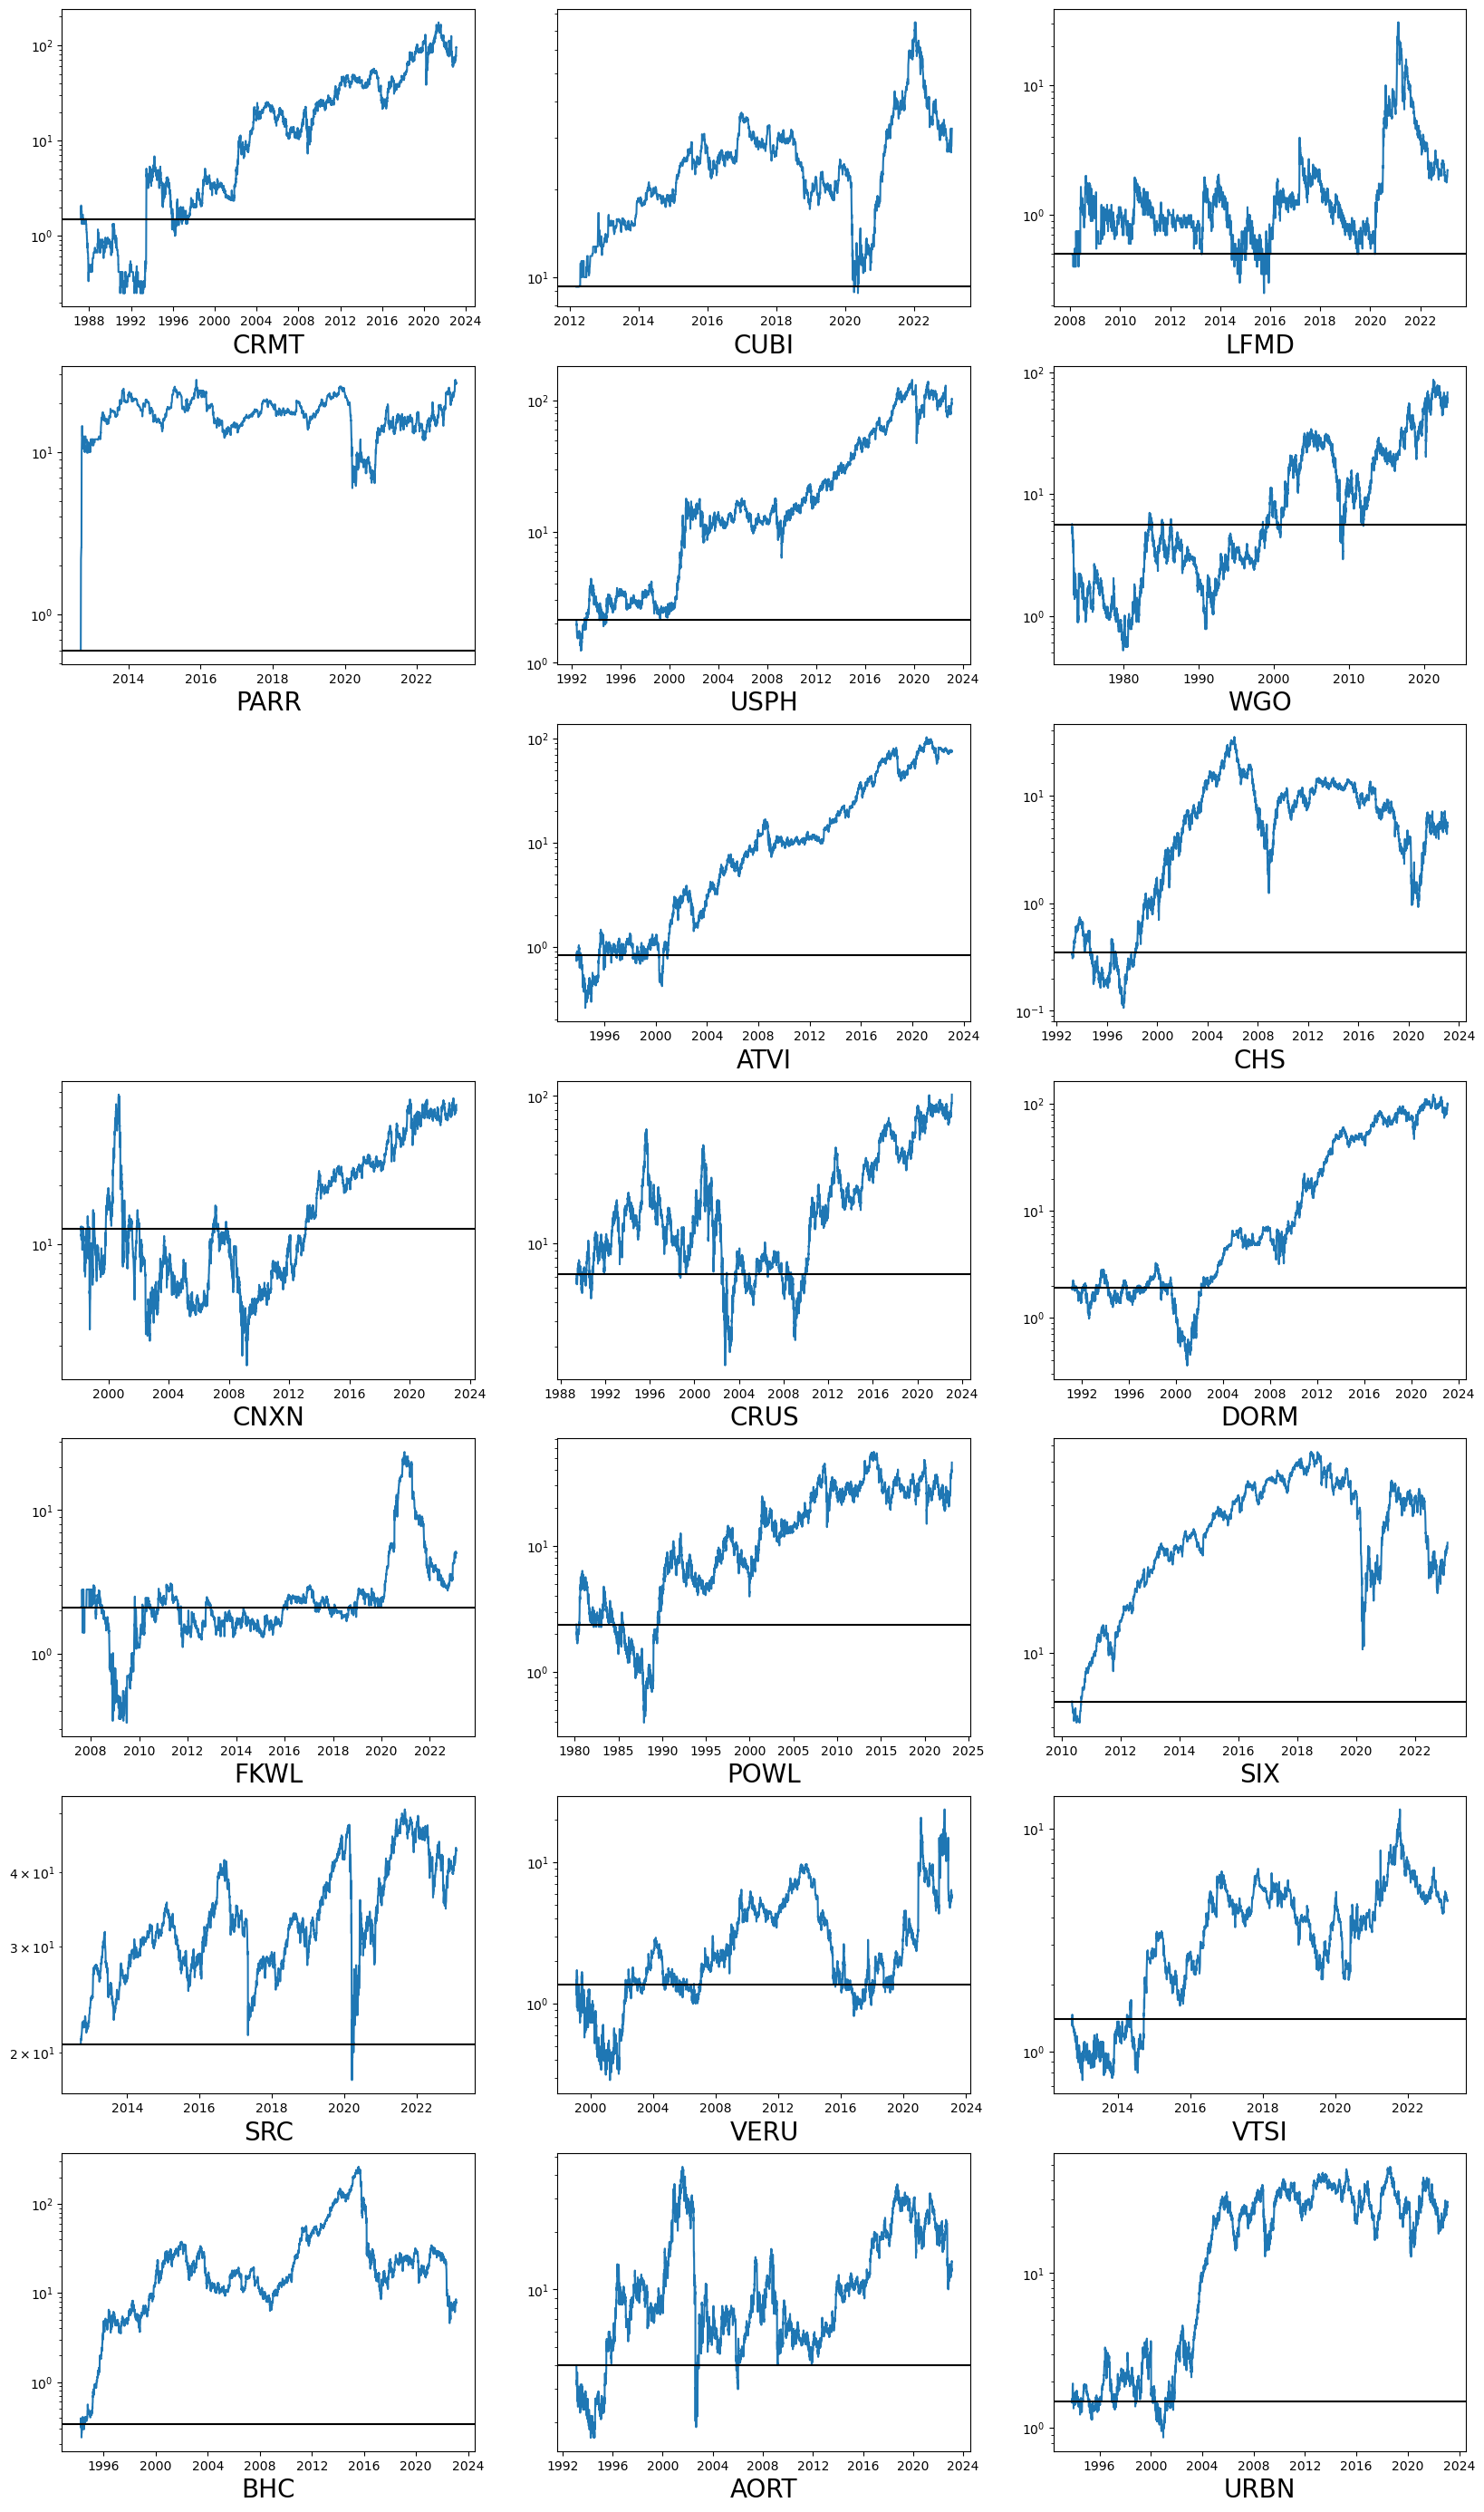

In [47]:
plt.rc('axes', labelsize=20)
plt.figure(figsize=[20, 35])
for i, sym in enumerate(list(data)):
    if sym == 'state':
        continue
    x = data[sym]
    x = x[x.notnull()]
    plt.subplot(7, 3, i + 1)
    plt.plot(x)
    plt.axhline(y=x[0], color='k')
    plt.xlabel(sym)
    plt.yscale('log');

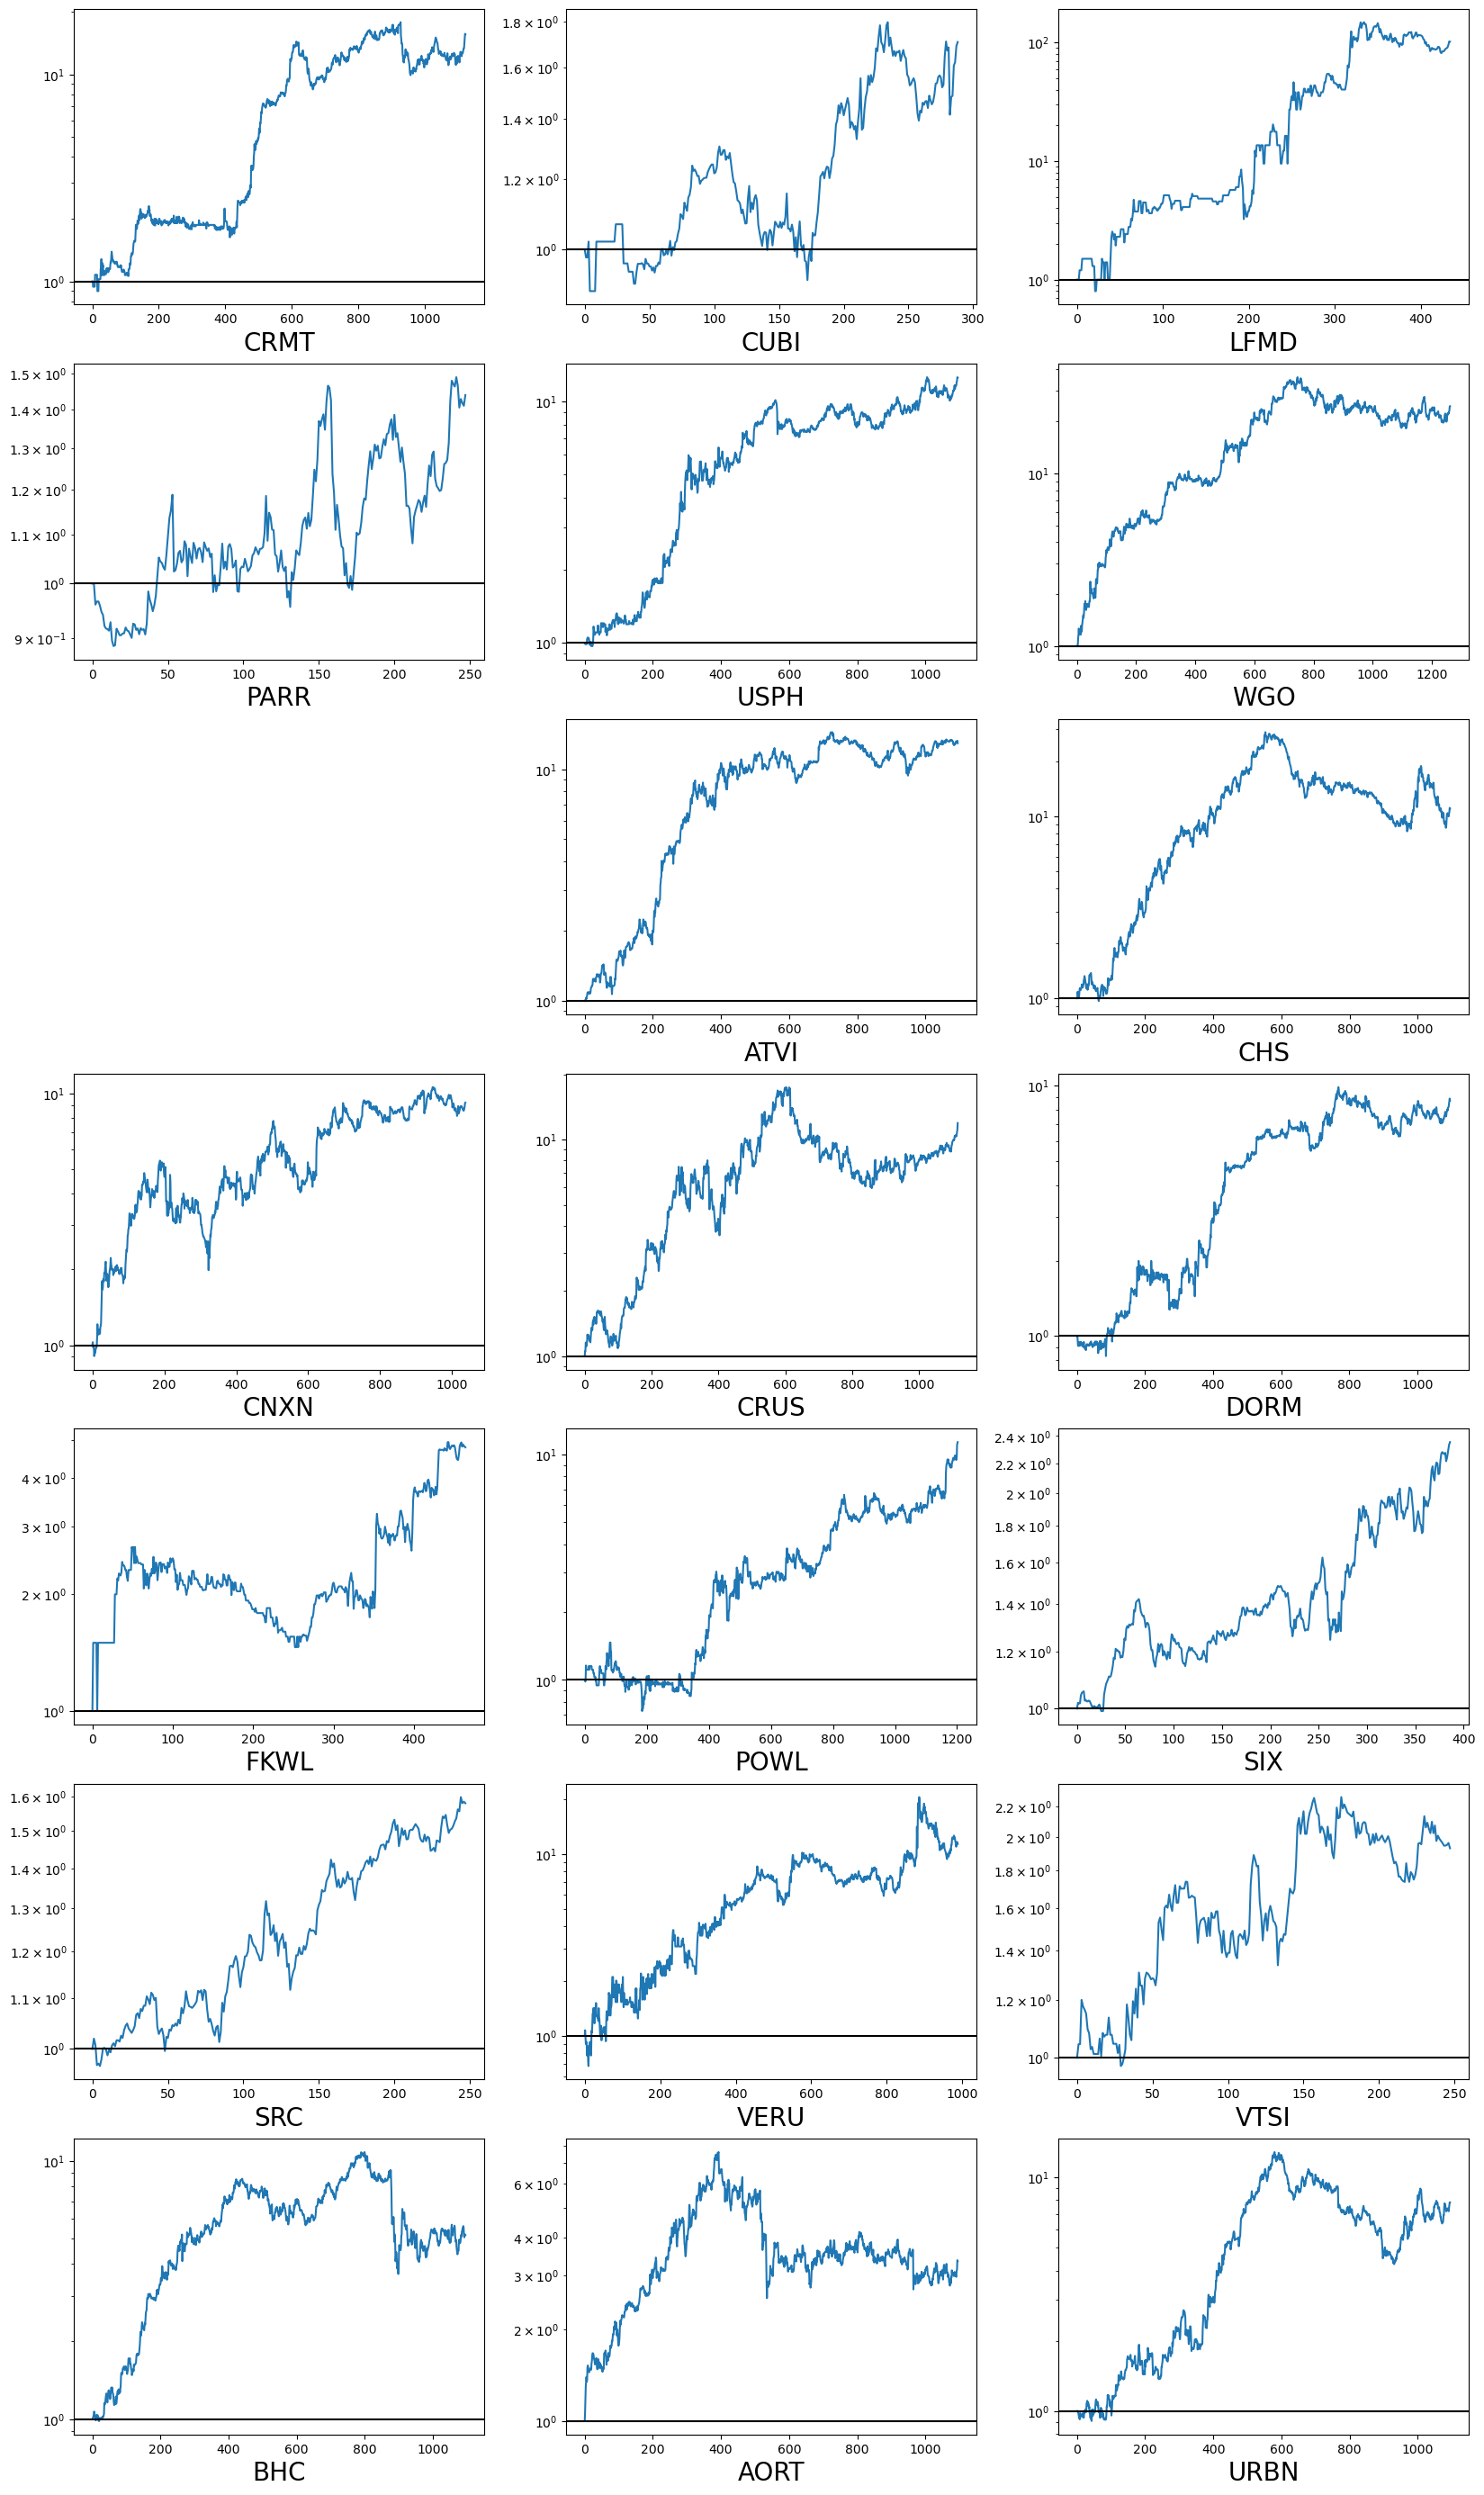

In [48]:
plt.figure(figsize=[20, 35])
for i, sym in enumerate(list(data)):
    if sym == 'state':
        continue
    plt.subplot(7, 3, i + 1)
    dr = get_daily_returns(data[sym])
    dr = dr[data.state == CURRENT_STATE]
    dr = dr[dr.notnull()]
    dr = (dr + 1).to_numpy()
    dr = np.array([1] + list(dr))
    plt.plot(dr.cumprod())
    plt.axhline(y=dr[0], color='k')
    plt.yscale('log')
    plt.xlabel(sym);

In [50]:
holdings = pd.read_csv(
    '~/Downloads/Holdings - Damian Satterthwaite-Phillips(1).csv',
    usecols=['Symbol', 'Value'],
    index_col=0
).rename(columns={'Value': 'holdings'})
holdings.holdings = holdings.holdings.apply(
    lambda x: round(float(x.replace('$', '').replace(',', ''))))
holdings.head()

,holdings
Symbol,
ATVI,9104
CEF,0
CF,3437
CRMT,10056
CUBI,10623


In [51]:
best_weighted = [
    s for s in df.index
    if s not in exclude[CURRENT_STATE] + always_exclude
][:10]

In [52]:
DOLLAR_AMT = 107866 + 59054
FRAC_IN = 0.7561
current = df.loc[best_weighted]
current['w'] = (current.weighted - 1) 
current.w = current.w / current.w.sum()
current['amt'] = (DOLLAR_AMT * FRAC_IN * current.w).round().astype(int)
current = pd.concat([current, holdings], axis=1)
current[['amt', 'holdings']] = current[['amt', 'holdings']].fillna(0).astype(int)
current['diff'] = current.amt - current.holdings
current.sort_values('diff')#.head(20)

,dar,dar_0,dar_1,dar_2,dar_3,dar_4,dar_5,dar_6,dar_7,weighted,w,amt,holdings,diff
PBF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,13741,-13741
MMYT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,9924,-9924
CF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3437,-3437
PARR,1.000642,0.991191,1.002252,1.002130,1.001914,1.001364,1.001608,0.998963,1.005031,1.001934,0.072171,9109,12253,-3144
UAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3122,-3122
MPC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3073,-3073
UTHR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2781,-2781
VTSI,1.000249,0.990980,1.000957,1.002185,1.002268,1.000552,1.001620,1.003385,1.002100,1.001927,0.071901,9074,10205,-1131
WGO,1.000077,0.986880,0.998273,1.002283,1.001962,1.001743,0.999164,1.001690,1.007350,1.002005,0.074818,9443,9927,-484
USPH,1.000663,0.992687,1.000144,1.002375,1.001267,1.001013,1.006817,1.001578,1.004174,1.002158,0.080506,10160,10629,-469
